In [2]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api

sns.set_theme(style="whitegrid")

C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Ouvertures des fichiers csv et pkl

In [5]:
#articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
#sample = pd.read_csv('sample_submission.csv')
transactions = pd.read_pickle('transactions_train.pkl')

## customers file

FN is if a customer get Fashion News newsletter = 1 \
Active is if the customer is active for communication =1 

* check the data
* check unique value in FN and fillNan by 0
* check unique value in Active and fillNan by 0
* customers.club_member_status replace Nan by NO ACTIVE
* customers.fashion_news_frequency replace none by NONE
* drop all Na ( first strategy.)

In [ ]:
customers.head(2)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [ ]:
customers.FN = customers.FN.fillna(0)
customers.Active = customers.Active.fillna(0)
customers.club_member_status = customers.club_member_status.fillna('NO ACTIVE')
customers.fashion_news_frequency=customers.fashion_news_frequency.replace('None','NONE')
customers = customers.dropna()


In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


### Merge le fichier customer avec le fichier de transaction sur la bases de l'ID client

1) merge customer et transactions par le numero client
2) grouper pour chaque client la somme qu'ils sont dépensees
3) grouper pour chaque client le nombre de produit acheté
4) garder une ligne par client de la base de données inititial et merge avec les sommes dépensées et le nombre de produit.\
chaque client aura un prix global dépensé et le nombre de produit acheté.
5) les dates d'achat, id de l'article acheté, le code postal a été supprimé

In [ ]:
df_customers = pd.merge(right = customers, left=transactions, on='customer_id')

In [ ]:
dff_customer=df_customers.drop_duplicates(subset='customer_id', keep='first')
dff_customer=dff_customer.drop(['t_dat','article_id','price','postal_code'],axis=1)

In [ ]:
price_by_id = df_customers.groupby('customer_id').sum()['price'].reset_index()
articles_by_id = df_customers.groupby('customer_id').count()['article_id'].reset_index()

In [ ]:
dff_customer = pd.merge(right = price_by_id, left=dff_customer, on='customer_id')
dff_customer = pd.merge(right = articles_by_id, left=dff_customer, on='customer_id')

In [ ]:
#save dataframe to pickle
dff_customer.rename(columns={'price':'total_price','article_id':'total_article'}, inplace=True)
dff_customer.to_pickle('customers_exploration.pkl')

In [4]:
# open the pickle dataframe

df = pd.read_pickle('customers_exploration.pkl')
df.head()

,customer_id,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,total_price,total_article
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2,0.0,0.0,ACTIVE,NONE,24.0,0.704780,18
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,2,1.0,1.0,ACTIVE,Regularly,32.0,3.823610,120
2,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,1,0.0,0.0,ACTIVE,NONE,29.0,0.627932,27
3,0008968c0d451dbc5a9968da03196fe20051965edde741...,2,1.0,1.0,ACTIVE,Regularly,50.0,1.513136,61
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,2,0.0,0.0,ACTIVE,NONE,22.0,1.490559,57


### Quelle est la distribution de l'age des clients ?

conclusion : distribution bimodale. 1er mode [20 30] ans deuxième mode 50 ans. 

Text(0.5, 1.0, 'Distribution des ages clients')

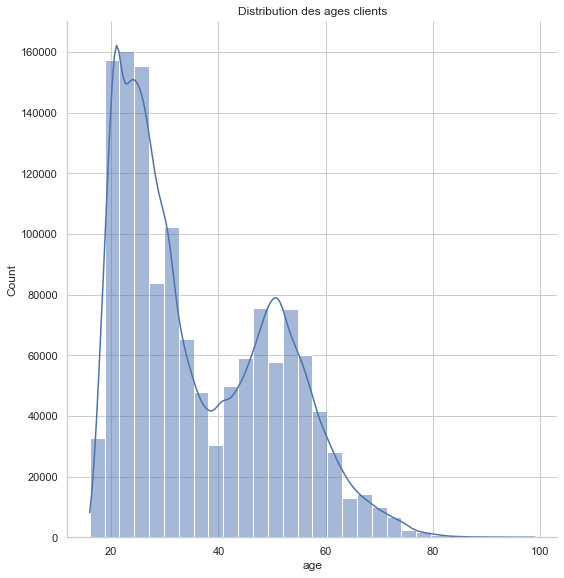

In [5]:
sns.displot(df.age,bins=30,kde=True,height=8)
plt.title('Distribution des ages clients')

### Répartition des valeurs qualitatives dans le set de données

FN et Active ont la meme répartition: 65 % des clients sont active, et recoivent des fashions newsletters\
93 % des clients sont membres. 6 % sont en création \
35 % des clients recoivent des régulièrement des news / 64 % ne recoivent rien \
65 % des achats se font par un canal offline contre 34 % par un canal online


In [ ]:
print('FN ***********************\n',df.FN.value_counts(normalize=True)*100)
print()
print('Active *******************\n',df.Active.value_counts(normalize=True)*100)
print()
print('club_member_status********\n',df.club_member_status.value_counts(normalize=True)*100)
print()
print('fashion_news_frequency****\n',df.fashion_news_frequency.value_counts(normalize=True)*100)
print()
print('sales_channel_id**********\n',df.sales_channel_id.value_counts(normalize=True)*100)

FN ***********************
 0.0    64.57215
1.0    35.42785
Name: FN, dtype: float64

Active *******************
 0.0    65.504144
1.0    34.495856
Name: Active, dtype: float64

club_member_status********
 ACTIVE        93.429296
PRE-CREATE     6.254812
NO ACTIVE      0.281151
LEFT CLUB      0.034741
Name: club_member_status, dtype: float64

fashion_news_frequency****
 NONE         64.472205
Regularly    35.464841
Monthly       0.062953
Name: fashion_news_frequency, dtype: float64

sales_channel_id**********
 2    65.242276
1    34.757724
Name: sales_channel_id, dtype: float64


### Répartition des prix dépensés par client et du nombre d'achat par client

En moyenne, un client achete 23 (+/- 39) articles et dépense en moyenne 0.66 (+/- 1.21) => disparité enorme des données\
disparité des données confortée par les min et max de total price, et de total article.

In [ ]:
df[['total_price','total_article']].describe().round(2)

,total_price,total_article
count,1332734.00,1332734.00
mean,0.66,23.65
std,1.21,39.56
min,0.00,1.00
25%,0.09,3.00
50%,0.25,10.00
75%,0.71,27.00
max,57.68,1895.00


### Age vs nb d'Article vs canal d'achat
clients > 80 ans ont été retirés ( les données semblent peu pertinentes dépasées 80 ans)\
On observe des achats en nombre plus important autour de l'age de 30 ans.\
Même observation quelque soit le canal d'achat

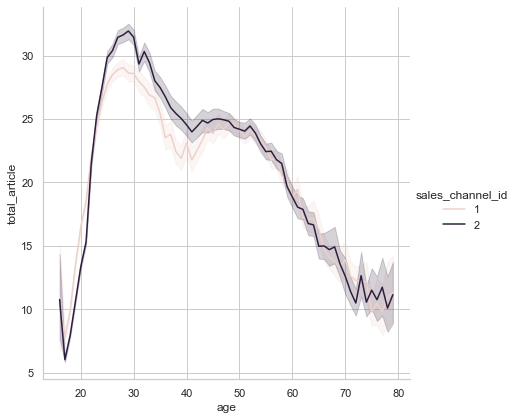

In [19]:
sns.relplot(x='age',y='total_article',data=df[df.age<80],kind='line',height=6,hue='sales_channel_id')

In [6]:
print('p_value H0:',pearsonr(df.age[df.age<80],df.total_article[df.age<80])[1])

p_value H0: 8.63333151290957e-55


### independance age vs nombre d'achat
H_0 : l'age est independant du nombre d'achat effectué
* p-value < 5%
    * H0 rejeté
    * L'age à un effet significatif sur le nombre d'achat



C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


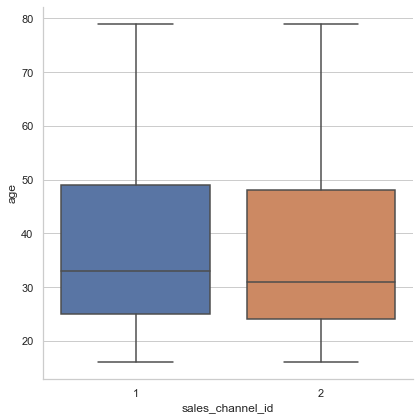

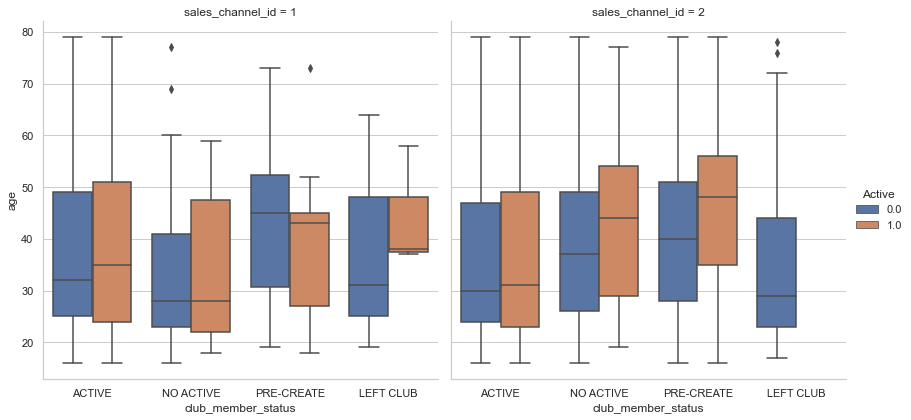

In [17]:
sns.catplot('sales_channel_id','age',data=df[df.age<80],height=6, kind='box')
sns.catplot('club_member_status','age',data=df[df.age<80],height=6, kind='box',hue='Active',col='sales_channel_id')


 * A priori pas de lien direct entre l'age et le type de canal de vente utilisé
 * Le type de canal notemment le canal offline semble être corrélé avec la variable "Active"   

### independance canal offline vs Active
H_0 : le canal offline est independant de la varibale Active
* p-value < 5%
    * H0 rejeté
    * Le canal d'achat offline à un effet significatif sur la variable Active

In [18]:
from scipy.stats.contingency import  chi2_contingency

df_channel_2 = df[df.sales_channel_id==2]
table = pd.crosstab(df_channel_2['Active'],df_channel_2['club_member_status'])
chi2, p, dof, ex = chi2_contingency(table)

print(table)
print("***********")
print('chi2:',chi2)
print('p:',p)
print('degré de liberté:',dof)

club_member_status  ACTIVE  LEFT CLUB  NO ACTIVE  PRE-CREATE
Active                                                      
0.0                 513878        423       3285       77792
1.0                 268331          0        290        5507
***********
chi2: 27852.26834950029
p: 0.0
degré de liberté: 3


### Segmentation client 

Utilisation d'une classification non supervisé Kmeans
* selection des variables
* plot controle de l'inertie pour le choix du nombre de cluster
* plot silouette score pour le choix du nombre de cluster
* visualiation des clients types

In [117]:
drop_list = ['customer_id','FN','total_price','fashion_news_frequency']
df_knn = df.drop(drop_list, axis=1)
df_knn.head()


,sales_channel_id,Active,club_member_status,age,total_article
0,2,0.0,ACTIVE,24.0,18
1,2,1.0,ACTIVE,32.0,120
2,1,0.0,ACTIVE,29.0,27
3,2,1.0,ACTIVE,50.0,61
4,2,0.0,ACTIVE,22.0,57


In [121]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df_knn = df_knn.replace({
    'club_member_status': {
        'ACTIVE':1,
        'NO ACTIVE':0,
        'PRE-CREATE':2,
        'LEFT CLUB':3}
})
df_knn

,sales_channel_id,Active,club_member_status,age,total_article
0,2,0.0,1,24.0,18
1,2,1.0,1,32.0,120
2,1,0.0,1,29.0,27
3,2,1.0,1,50.0,61
4,2,0.0,1,22.0,57
...,...,...,...,...,...
1332729,2,1.0,1,48.0,7
1332730,2,0.0,1,79.0,1
1332731,2,1.0,1,21.0,4
1332732,2,1.0,1,53.0,2


In [ ]:
# utilisation de Kmeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_knn)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [78]:
# utilisation de MiniBatchKMeans pour diminuer le temps de calcul
from sklearn.cluster import MiniBatchKMeans
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(df_knn)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\dasilvaj2154\.conda\envs\datascientest\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by settin

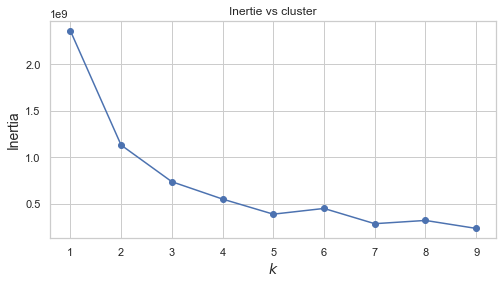

In [96]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title('Inertie vs cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_knn, model.labels_)
                     for model in kmeans_per_k[1:]]

In [126]:
# segmentation client avec 5 clusters
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_knn)
centroids = pd.DataFrame(kmeans.cluster_centers_).round()
centroids.columns =['sales_channel_id','Active','club_member_status','age','total_article']

centroids = centroids.replace({
    'club_member_status': {
        1:'ACTIVE',
        0:'NO ACTIVE',
        2:'PRE-CREATE',
        3:'LEFT CLUB'}
})
centroids

,sales_channel_id,Active,club_member_status,age,total_article
0,2.0,0.0,ACTIVE,26.0,10.0
1,2.0,0.0,ACTIVE,35.0,56.0
2,2.0,0.0,ACTIVE,36.0,138.0
3,2.0,1.0,ACTIVE,37.0,324.0
4,2.0,0.0,ACTIVE,53.0,9.0


In [127]:
# segmentation client avec 3 clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_knn)
centroids = pd.DataFrame(kmeans.cluster_centers_).round()
centroids.columns =['sales_channel_id','Active','club_member_status','age','total_article']
centroids = centroids.replace({
    'club_member_status': {
        1:'ACTIVE',
        0:'NO ACTIVE',
        2:'PRE-CREATE',
        3:'LEFT CLUB'}
})
centroids

,sales_channel_id,Active,club_member_status,age,total_article
0,2.0,0.0,ACTIVE,36.0,11.0
1,2.0,0.0,ACTIVE,37.0,228.0
2,2.0,0.0,ACTIVE,36.0,74.0
